In [28]:
#Libraries used:

In [72]:
import pandas as pd #Used for data manipulation
import matplotlib.pyplot as plt # Used to create visualisation and plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Plotting ACF and PACF used towards time series analysis
from statsmodels.tsa.arima.model import ARIMA # Time series forecasting (ARIMA model)
import seaborn as sns # Improves the visualisation 
from arch import arch_model # ARCH/GARCH models

In [74]:
#Reads the excel file into pandas dataframe (df)
df = pd.read_excel("AAPL_data.xlsx")
#Converts the "Date" column from string format to datetime object 
df["Date"] = pd.to_datetime(df["Date"], format = "%b %d, %Y")
#Dataframe is modified directly, rather than creating a copy
df.set_index("Date", inplace = True)

In [76]:
#Adjusted Close presents the true stock value by accounting for splits & dividends
#Useful for accurate analysis, comparisons and informed decisions

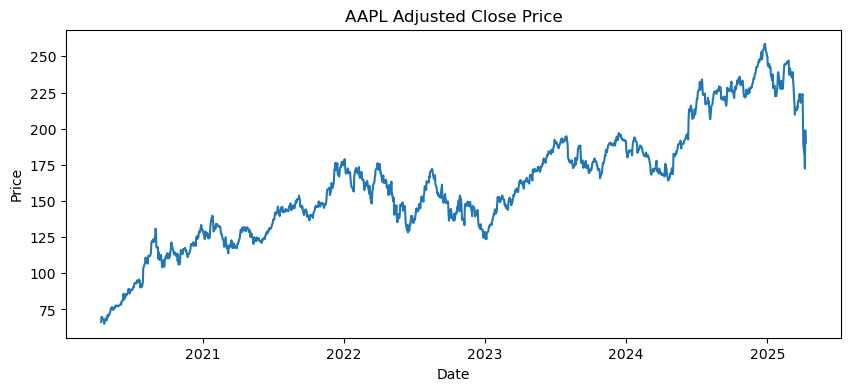

In [78]:
#Extract the "ADJ.Close" from DataFrame and assigns it to variable timeSeries
timeSeries = df["ADJ.Close"]
timeSeries = timeSeries.asfreq('B', method='ffill')
#Figure size for the dimensions of the plot
plt.figure(figsize=(10,4))
#Plots the timeSeries data on the figure
plt.plot(timeSeries)
plt.title("AAPL Adjusted Close Price")
plt.xlabel("Date")
plt.ylabel("Price")
#Displays the plot
plt.show()

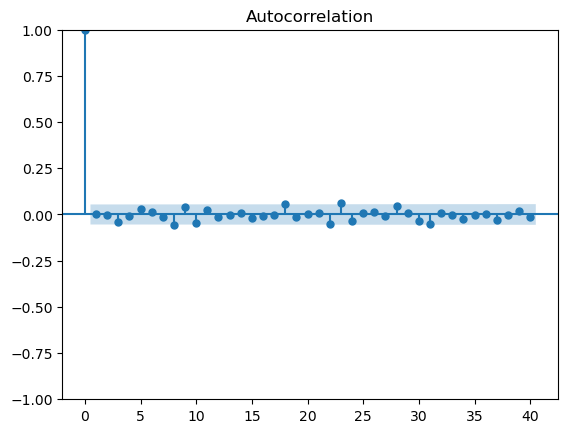

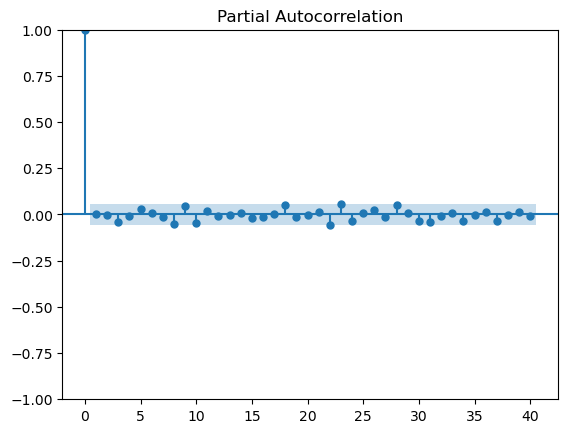

In [80]:
#Autocorrelation (ACF) is used to find the correlation between a time series and its past values.
plot_acf(timeSeries.diff().dropna(), lags = 40)
#Partial autocorrelation (PACF) is used to direct correlation between values at a specific lag (40).
plot_pacf(timeSeries.diff().dropna(), lags = 40)
plt.show()

In [82]:
#Creates the ARIMA model
arima_model = ARIMA(timeSeries, order=(5, 1, 2))
#Fits the ARIMA model to the timeSeries data
arima_result = arima_model.fit()
#Prints the summary of the fitted model
print(arima_result.summary())

C:\Users\Leon\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Leon\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:              ADJ.Close   No. Observations:                 1304
Model:                 ARIMA(5, 1, 2)   Log Likelihood               -3238.071
Date:                Mon, 21 Jul 2025   AIC                           6492.142
Time:                        09:23:45   BIC                           6533.521
Sample:                    04-13-2020   HQIC                          6507.666
                         - 04-10-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1920      0.238      0.805      0.421      -0.275       0.659
ar.L2         -0.7466      0.234     -3.195      0.001      -1.205      -0.289
ar.L3         -0.0395      0.026     -1.512      0.1

In [97]:
#Residuals in ARIMA are the differences between actual values and the model's predicted values.

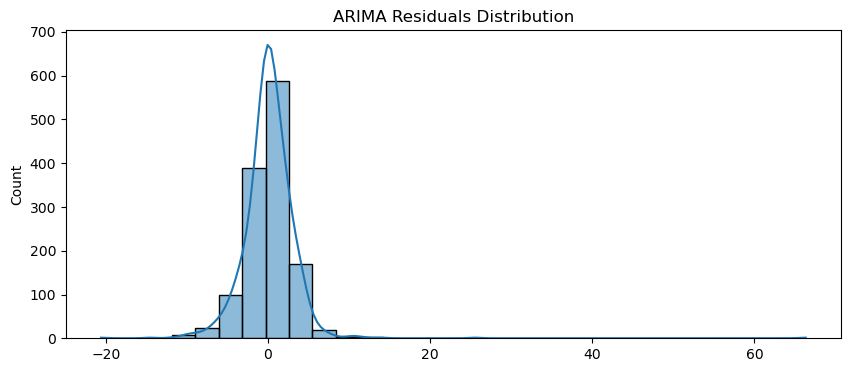

In [86]:
#Extracts the residuals from the ARIMA model result
residuals = arima_result.resid
plt.figure(figsize = (10,4))
#Uses seaborn to plot a histogram of the risidual, kernel density estimate is added and dividing the data into 30 bins
sns.histplot(residuals, kde = True, bins =30)
plt.title("ARIMA Residuals Distribution")
plt.show()

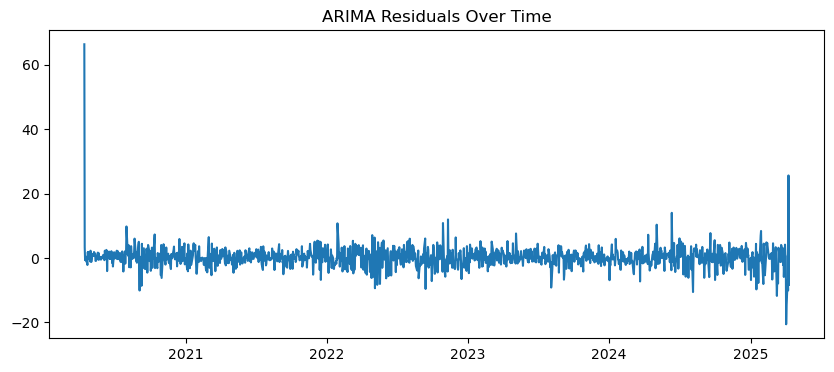

In [88]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title("ARIMA Residuals Over Time")
plt.show()

In [90]:
#Calculates percentage returns from a timeSeries, multiplies by 100 to be a percentage and removes any not applicable values
returns = 100 * timeSeries.pct_change().dropna()
#Creates the garch model
garch_model = arch_model(returns, vol = "Garch", p = 1, q = 1)
#Displays the garch model to the data with display output turned off
garch_result = garch_model.fit(disp = "off")
print(garch_result.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:              ADJ.Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2555.24
Distribution:                  Normal   AIC:                           5118.48
Method:            Maximum Likelihood   BIC:                           5139.17
                                        No. Observations:                 1303
Date:                Mon, Jul 21 2025   Df Residuals:                     1302
Time:                        09:23:48   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1258  4.679e-02      2.688  7.197e-03 [3.405e-0

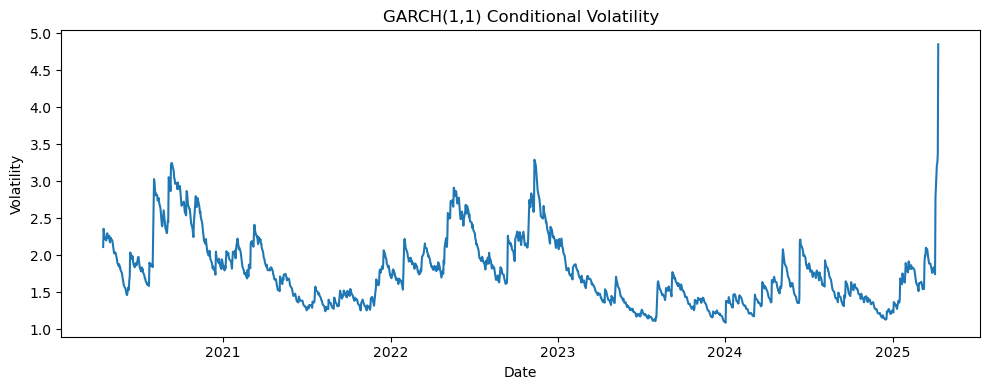

In [92]:
plt.figure(figsize=(10, 4))
plt.plot(garch_result.conditional_volatility)
plt.title("GARCH(1,1) Conditional Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.tight_layout()
plt.show()

In [94]:
print(f"ARIMA AIC: {arima_result.aic}")
print(f"ARIMA BIC: {arima_result.bic}")
print(f"GARCH AIC: {arima_result.aic}")
print(f"GARCH AIC: {arima_result.bic}")

ARIMA AIC: 6492.141901755685
ARIMA BIC: 6533.521298372683
GARCH AIC: 6492.141901755685
GARCH AIC: 6533.521298372683
